<div class="alert alert-info">
    <h2 align="center"> Week 10: Deep Learning And Convolutional Neural Network</h2>
    <h3 align="center"><a href="http://www.snrazavi.ir">Seyed Naser RAZAVI</a></h3>
</div>

# Recall
- **Machine Learning:** Data + Model + Optimization

### Data:
- **Image Data:** CIFAR-10

### Model
- **Linear classification:** linear score function
- **Non-linear classification:** Multi-layer Neural Networks

### Optimization
- **Loss function:** SVM or Softmax
- **Optimization:** Gradient Decsent, SGD, SGD + momentum, etc.
- **Backpropagation:** Computing gradients using chain rule
- **Techniques:** Regularization, Batch Normalization, Dropout, Data Augmentation, etc.

# Today's Topics
- Introduction to CNN
- Introduction to Keras
- Implementing CNN Using Keras 

<img align="left" src="http://www.snrazavi.ir/imgs/Keras.png" width="30%"/>

# Why Keras?
- A very simple and popular framework for **Deep Learning**: (2nd place, 2017)
- It is easy to learn and easy to use.
- Very flexible and powerfull: it works on top of **Tensorflow** from Google.

For more information, please see <a href="https://keras.io">here</a>.

<img src="http://www.snrazavi.ir/imgs/DL-frameworks.png" width="75%"/>

## How to install Keras
- If you are using anaconda distribution for python, installing Keras is a very simple task.
- Just type the following in the command prompt:

#### GPU version:
<code>
> conda install -c anaconda keras-gpu
</code>

#### CPU version:
<code>
> conda install -c anaconda keras
</code>

In [25]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [26]:
image_size = 32
num_channels = 3
num_features = image_size * image_size * num_channels
num_classes = 10

num_train = 49000

# Load CIFAR10 Dataset

In [27]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Train data shape: {}'.format(X_train.shape))
print('Test  data shape: {}'.format(X_test.shape))

Train data shape: (50000, 32, 32, 3)
Test  data shape: (10000, 32, 32, 3)


## Data Visualization

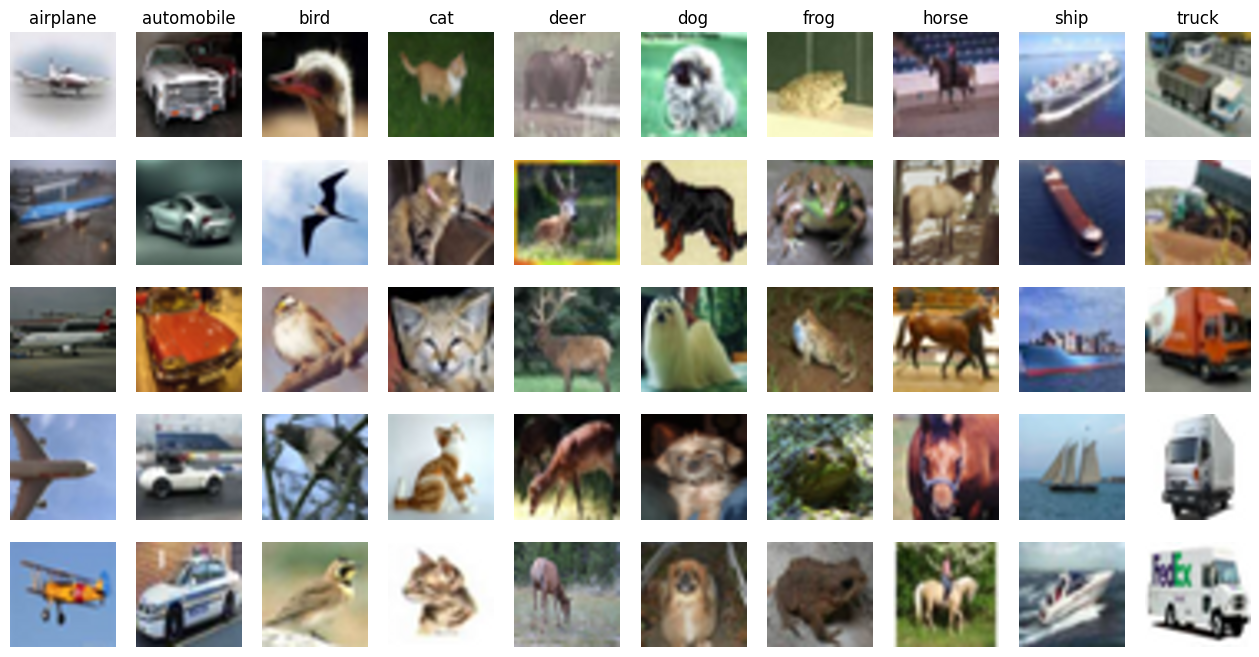

In [28]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 5

plt.figure(figsize=(16, 8))

for cls, name in enumerate(class_names):
    idxs = np.flatnonzero(y_train == cls)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(samples_per_class, num_classes, i * num_classes + cls + 1)
        plt.imshow(X_train[idx], interpolation='spline16')
        plt.axis('off')
        if i == 0:
            plt.title(class_names[cls])

## Data Preprocessing

In [29]:
# Convert 4D arrays to 2D arrays
X_train = X_train.reshape([-1, num_features])
X_test  =  X_test.reshape([-1, num_features])

print('Train data shape: {}'.format(X_train.shape))
print('Test  data shape: {}'.format(X_test.shape))

Train data shape: (50000, 3072)
Test  data shape: (10000, 3072)


In [30]:
# convert pixel range from [0, 255] to [0., 1.]
X_train = X_train.astype('float32')
x_test  = X_test.astype('float32')

mu = np.mean(X_train, axis=0)

X_train -= mu
X_train /= 255.0

x_test -= mu
x_test /= 255.0

## One-hot encodding
- We have 10 classes: 0, 1, ..., 9

In one-hot encoding, we represent labels using vectors.

```python
0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
.
.
.
9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
```

In [31]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


# Linear Classifier

## $$f(x, W, b) = Wx+b$$

<img src="http://www.snrazavi.ir/imgs/linear_classifier.jpg" width="75%"/>

In [32]:
model_linear = Sequential()  # a sequence of layers
model_linear.add(Dense(num_classes, input_shape=(num_features,), activation='softmax'))

In [33]:
model_linear.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                30730     
                                                                 
Total params: 30730 (120.04 KB)
Trainable params: 30730 (120.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train Model

In [34]:
model_linear.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
history = model_linear.fit(X_train[:num_train], y_train[:num_train], 
                    batch_size=512, 
                    epochs=15,
                    verbose=2,
                    validation_data=(X_train[num_train:], y_train[num_train:]),
                    shuffle=True)

Epoch 1/15


2023-07-12 00:10:34.071502: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 602112000 exceeds 10% of free system memory.


96/96 - 1s - loss: 2.1149 - accuracy: 0.2421 - val_loss: 2.0176 - val_accuracy: 0.3020 - 1s/epoch - 13ms/step
Epoch 2/15
96/96 - 1s - loss: 1.9728 - accuracy: 0.3109 - val_loss: 1.9448 - val_accuracy: 0.3380 - 676ms/epoch - 7ms/step
Epoch 3/15
96/96 - 1s - loss: 1.9186 - accuracy: 0.3351 - val_loss: 1.9071 - val_accuracy: 0.3510 - 642ms/epoch - 7ms/step
Epoch 4/15
96/96 - 1s - loss: 1.8865 - accuracy: 0.3507 - val_loss: 1.8820 - val_accuracy: 0.3610 - 634ms/epoch - 7ms/step
Epoch 5/15
96/96 - 1s - loss: 1.8644 - accuracy: 0.3607 - val_loss: 1.8643 - val_accuracy: 0.3730 - 860ms/epoch - 9ms/step
Epoch 6/15
96/96 - 1s - loss: 1.8479 - accuracy: 0.3671 - val_loss: 1.8521 - val_accuracy: 0.3820 - 703ms/epoch - 7ms/step
Epoch 7/15
96/96 - 1s - loss: 1.8350 - accuracy: 0.3711 - val_loss: 1.8410 - val_accuracy: 0.3830 - 627ms/epoch - 7ms/step
Epoch 8/15
96/96 - 1s - loss: 1.8244 - accuracy: 0.3753 - val_loss: 1.8321 - val_accuracy: 0.3840 - 634ms/epoch - 7ms/step
Epoch 9/15
96/96 - 1s - loss:

In [36]:
model_linear.save('Linear-model.keras')

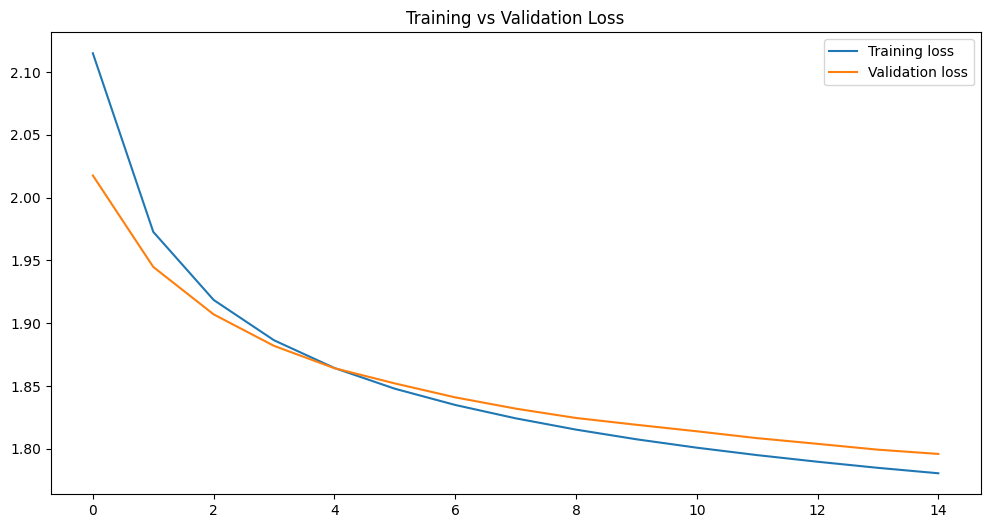

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

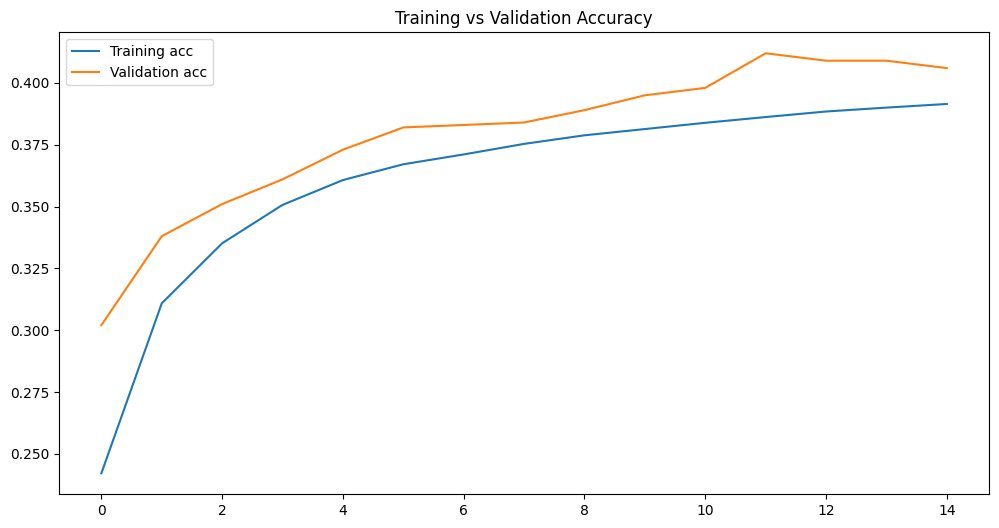

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label="Training acc")
plt.plot(history.history['val_accuracy'], label="Validation acc")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

## Predicting class for new images

In [42]:
# Select 25 random images from test images
idx = np.random.choice(x_test.shape[0], 25, replace=False)

# predict class for selected images
y_pred = model_linear.predict(x_test[idx]).argmax(axis=1)

# True class for selected images
y_true = y_test[idx].argmax(axis=1)

print('Test Accuracy = %.2f' % (100.0 * np.mean(y_pred == y_true)))

1/1 [==============================] - 0s 24ms/step


Test Accuracy = 48.00


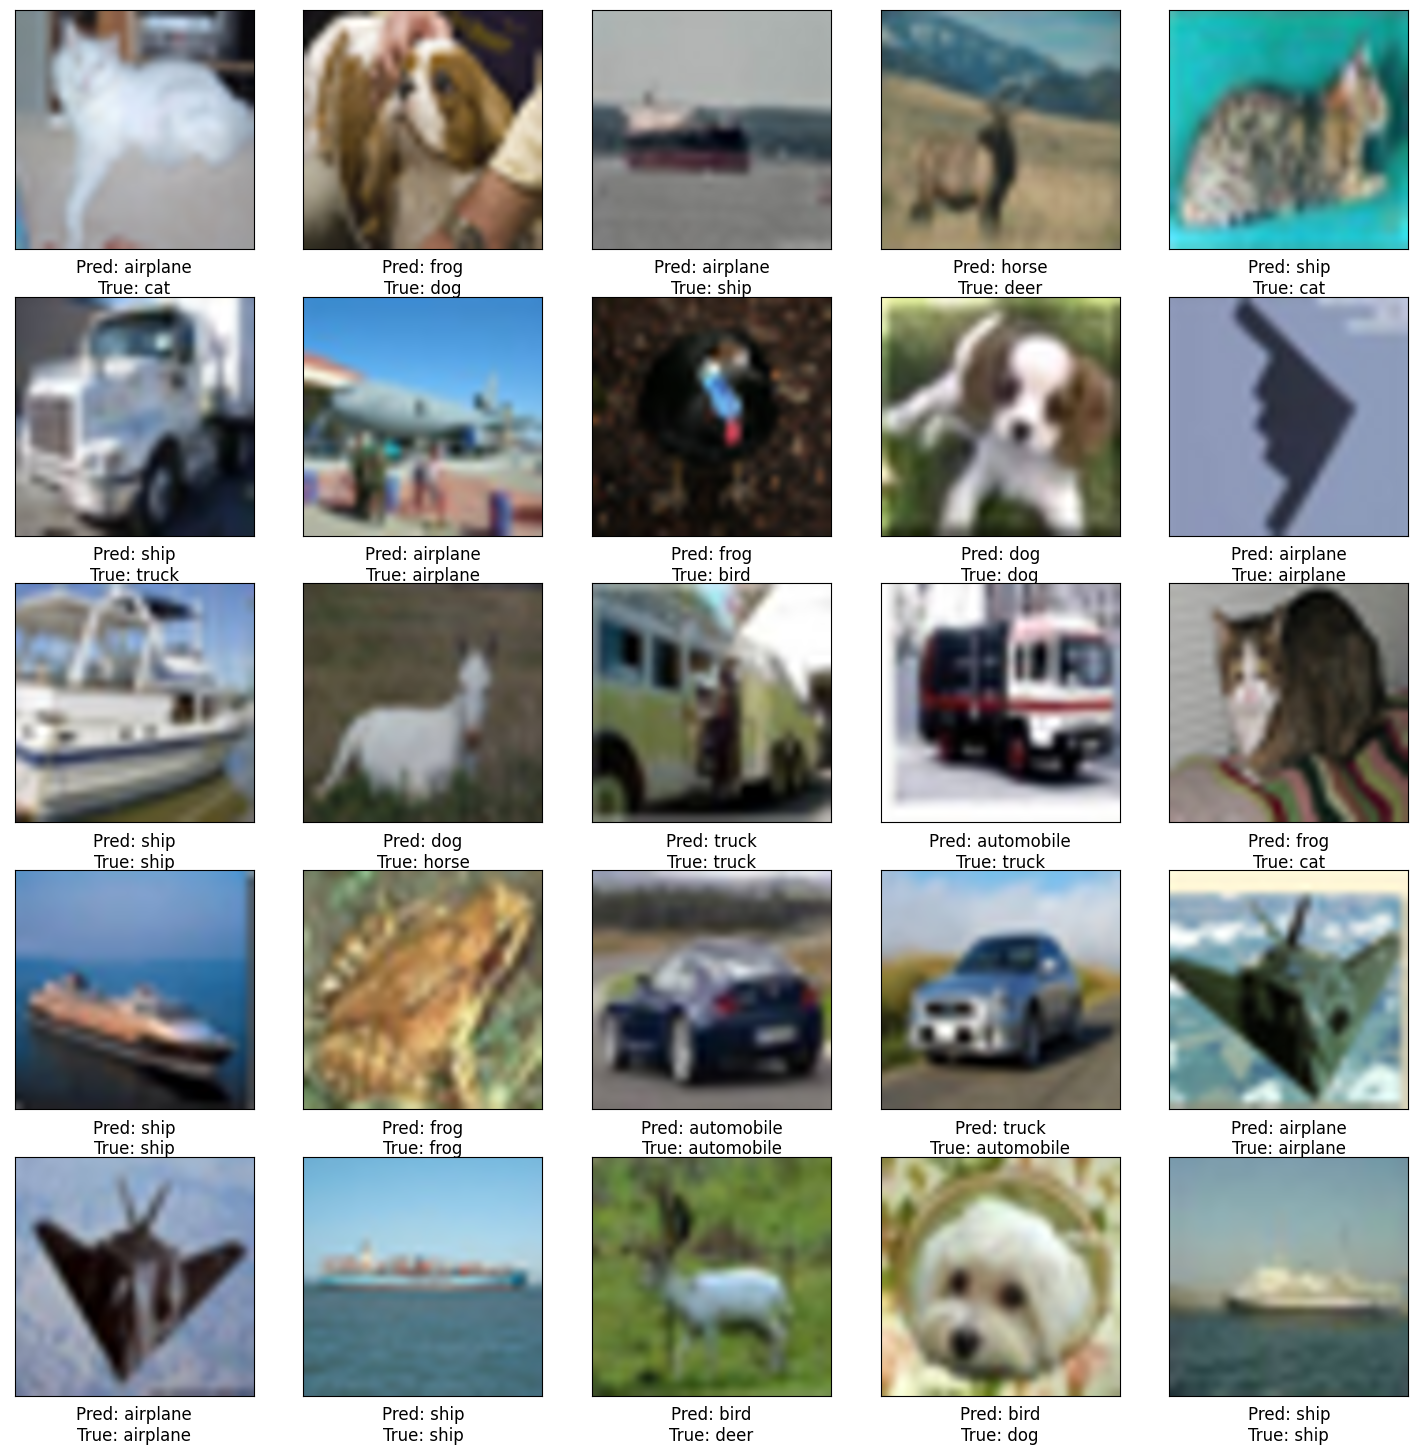

In [43]:
fig, axes = plt.subplots(5, 5, figsize=(18, 18))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[idx[i]].reshape(image_size, image_size, num_channels), interpolation='spline16')
    pred_class = class_names[y_pred[i]]
    true_class = class_names[y_true[i]]
    ax.set_xlabel('Pred: {}\nTrue: {}'.format(pred_class, true_class), fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])

# Multi-layer Neural Network

### $$f(x) = W_3 \times \max(W_2 \times \max(0, W_1 x))$$

<img src="http://www.snrazavi.ir/imgs/neural_net2.jpeg" width="50%"/>

In [44]:
model_multi_layer = Sequential()

# First hidden Layer
model_multi_layer.add(Dense(units=100, input_shape=(num_features,), activation='relu'))

# Second hidden Layer
model_multi_layer.add(Dense(units=100, activation='relu'))
model_multi_layer.add(Dense(units=100, input_shape=(num_features,), activation='relu'))

# Output Layer
model_multi_layer.add(Dense(units=num_classes, activation='softmax'))

In [45]:
model_multi_layer.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               307300    
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 328510 (1.25 MB)
Trainable params: 328510 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training the model

In [46]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001)
model_multi_layer.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
model_multi_layer.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=15,
          validation_data=(X_train[num_train:], y_train[num_train:]))

Epoch 1/15


2023-07-12 00:17:53.720534: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 602112000 exceeds 10% of free system memory.


192/192 [==============================] - 2s 10ms/step - loss: 1.7036 - accuracy: 0.3932 - val_loss: 1.5997 - val_accuracy: 0.4400
Epoch 2/15
192/192 [==============================] - 2s 9ms/step - loss: 1.4967 - accuracy: 0.4718 - val_loss: 1.5265 - val_accuracy: 0.4660
Epoch 3/15
192/192 [==============================] - 2s 9ms/step - loss: 1.3994 - accuracy: 0.5061 - val_loss: 1.4920 - val_accuracy: 0.4560
Epoch 4/15
192/192 [==============================] - 2s 9ms/step - loss: 1.3270 - accuracy: 0.5331 - val_loss: 1.4341 - val_accuracy: 0.5010
Epoch 5/15
192/192 [==============================] - 2s 9ms/step - loss: 1.2705 - accuracy: 0.5529 - val_loss: 1.4231 - val_accuracy: 0.5030
Epoch 6/15
192/192 [==============================] - 2s 9ms/step - loss: 1.2243 - accuracy: 0.5684 - val_loss: 1.4192 - val_accuracy: 0.5090
Epoch 7/15
192/192 [==============================] - 2s 9ms/step - loss: 1.1789 - accuracy: 0.5879 - val_loss: 1.4387 - val_accuracy: 0.5080
Epoch 8/15
192/1

In [48]:
model_multi_layer.save('multi_layer_nn.keras')
# model = keras.models.load_model('nn.h5')

## Adding Dropout and Batch Normalization

In [49]:
from keras.layers import BatchNormalization, Dropout

In [50]:
model_dropout = Sequential()

# First Hidden Layer
model_dropout.add(Dense(units=100, input_shape=(num_features,)))
model_dropout.add(BatchNormalization())
model_dropout.add(Activation(activation='relu'))
model_dropout.add(Dropout(0.2))

# Second Hidden Layer
model_dropout.add(Dense(units=100))
model_dropout.add(BatchNormalization())
model_dropout.add(Activation(activation='relu'))
model_dropout.add(Dropout(0.2))

# Output Layer
model_dropout.add(Dense(units=num_classes, activation='softmax'))

# print model
model_dropout.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               307300    
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                     

### Training the model

In [51]:
optimizer = keras.optimizers.Adam(learning_rate=0.02, epsilon=1e-6)
model_dropout.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
model_dropout.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=15,
          validation_data=(X_train[num_train:], y_train[num_train:]))

Epoch 1/15


2023-07-12 00:22:04.506063: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 602112000 exceeds 10% of free system memory.


192/192 [==============================] - 4s 12ms/step - loss: 1.8122 - accuracy: 0.3477 - val_loss: 1.6030 - val_accuracy: 0.4280
Epoch 2/15
192/192 [==============================] - 2s 11ms/step - loss: 1.6284 - accuracy: 0.4169 - val_loss: 1.5075 - val_accuracy: 0.4570
Epoch 3/15
192/192 [==============================] - 2s 11ms/step - loss: 1.5545 - accuracy: 0.4437 - val_loss: 1.4236 - val_accuracy: 0.5030
Epoch 4/15
192/192 [==============================] - 2s 11ms/step - loss: 1.5042 - accuracy: 0.4604 - val_loss: 1.3918 - val_accuracy: 0.4940
Epoch 5/15
192/192 [==============================] - 2s 11ms/step - loss: 1.4656 - accuracy: 0.4748 - val_loss: 1.3823 - val_accuracy: 0.5050
Epoch 6/15
192/192 [==============================] - 2s 12ms/step - loss: 1.4380 - accuracy: 0.4814 - val_loss: 1.3633 - val_accuracy: 0.5010
Epoch 7/15
192/192 [==============================] - 2s 11ms/step - loss: 1.4126 - accuracy: 0.4969 - val_loss: 1.3555 - val_accuracy: 0.5030
Epoch 8/15

In [53]:
model_dropout.save('nn-dropout-bn.keras')
# model = keras.models.load_model('nn-dropout-bn.h5')

In [54]:
model_dropout.evaluate(x_test, y_test, batch_size=256)

22/40 [===============>..............] - ETA: 0s - loss: 1.3263 - accuracy: 0.5236

2023-07-12 00:23:07.472710: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


40/40 [==============================] - 0s 5ms/step - loss: 1.3410 - accuracy: 0.5169


[1.3410120010375977, 0.5169000029563904]

# Convolutional Neural Networks

<img src="http://www.snrazavi.ir/imgs/CNN.png" width="75%"/>

<img src="http://www.snrazavi.ir/imgs/cnn_flowchart.png" width="100%"/>

## Convolution layer

<img src="http://www.snrazavi.ir/imgs/conv_layer.gif" width="80%"/>

## Pooling layer

<img src="http://www.snrazavi.ir/imgs/maxpool.jpeg" width="60%"/>

### Visualization and Underestanding CNN
See This <a href="https://www.youtube.com/watch?v=ghEmQSxT6tw&t=1001s">video from Matt Zeiler</a> for a better understanding of convolutional neural network.

In [ ]:
%%HTML
<iframe width="854" height="480" src="https://www.youtube.com/embed/ghEmQSxT6tw" frameborder="0" gesture="media" allow="encrypted-media" allowfullscreen></iframe>

## Converting dataset to 4D array

In [ ]:
X_train = X_train.reshape((-1, image_size, image_size, num_channels))
X_test  =  X_test.reshape((-1, image_size, image_size, num_channels))
x_test  =  x_test.reshape((-1, image_size, image_size, num_channels))

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [ ]:
def create_cnn():
    model = Sequential()

    # Conv Block 1
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 2
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 3
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Classifier
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

model = create_cnn()

#print model
model.summary()

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=200,
          epochs=1,
          validation_data=(X_train[num_train:], y_train[num_train:]))

## Data Augmentation
<img src="http://www.snrazavi.ir/imgs/09-Augmentation.jpg" width="80%"/>

In [ ]:
model = create_cnn()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

epochs = 5
batch_size = 256
data_augmentation = True


if not data_augmentation:
    print('Training without data augmentation.')
    model.fit(X_train[:num_train], y_train[:num_train], 
              batch_size=batch_size, 
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)
else:
    print('Training using real-time data augmentation.')
    datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range=0, 
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=True, 
        vertical_flip=False)
    
    datagen.fit(X_train[:num_train])
    
    model.fit_generator(datagen.flow(X_train[:num_train], y_train[:num_train], batch_size=batch_size),
                        steps_per_epoch=num_train//batch_size,
                        epochs=epochs,
                        validation_data=(X_train[num_train:], y_train[num_train:]))

### Saving and Loading model

In [ ]:
# model.save('cnn_data_augmentation.h5')

In [ ]:
model = keras.models.load_model('cnn_data_augmentation.h5')

In [ ]:
model.evaluate(x_test, y_test, batch_size=250)

## Predicting class for new images

In [ ]:
y_test = np.argmax(y_test, axis=1) # to 0, 1, ..., 9

In [ ]:
plt.figure(figsize=(12, 24))
idx = np.random.choice(len(x_test), 10, replace=False)

p = model.predict(x_test[idx])

for i in range(len(idx)):
    plt.subplot(10, 2, 2*i+1)
    plt.imshow(X_test[idx[i]], interpolation='spline16')
    plt.title(class_names[y_test[idx[i]]])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred_label = np.argsort(-p[i])[:3]
    pred_prob = [p[i][l] for l in pred_label]
    pred_label = [class_names[l] for l in pred_label]
    
    plt.subplot(10, 2, 2*i+2)
    plt.bar(range(3), pred_prob)
    plt.xticks(range(3), pred_label)

plt.show()

# Last Word
- Solve problems (<a href="www.kaggle.com">Kaggle</a> is a very good place to start)
- Read papers
- Write about your experiments (both failure and success)
- Attend in my Deep Learning workshop (within 4 to 6 weeks)

# What will be covered in DL workshop?
- A framework for coding (Tensorflow, pyTorch, Keras)
- Convolutional Neural Networks (a deeper look)
- Recurrent Neural Networks for temporal data (text, speech, video)
- Generative Models
- Deep reinforcement Learning (robotics, game, self-driving cars)
- Some applications (Image Captioning, Sentiment Analysis, Machine Translation, etc.)

See you soon!